# Exercise 4

## Data Source

The COVID-19 data used in this project is sourced from [The New York Times's GitHub repository](https://github.com/nytimes/covid-19-data). We would like to thank The New York Times for making this valuable data publicly available.

## Plotting New COVID-19 Cases for Selected States

Given the dataset `us-states.csv` from The New York Times, which provides running totals of COVID-19 cases for US states, our goal is to visualize the **new cases** for a selected list of states.

### Function Design

We'll create a function `plot_new_cases` which takes a list of state names and plots the new cases against dates using overlaid line graphs.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_new_cases(states):
    # Load the data
    url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
    df = pd.read_csv(url)

    # Convert the 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])

    plt.figure(figsize=(14, 8))
    
    for state in states:
        state_data = df[df['state'] == state]
        
        # Calculate the new cases
        state_data['new_cases'] = state_data['cases'].diff()
        
        # Plot new cases for the state
        plt.plot(state_data['date'], state_data['new_cases'], label=state)

    plt.title('New COVID-19 Cases vs. Date')
    plt.xlabel('Date')
    plt.ylabel('New Cases')
    plt.legend()
    plt.grid(True)
    plt.show()

### Limitations:

1. The first date for each state will have NaN for new cases since there's no previous data point to compare.
2. For states with similar new case trends, lines may overlap, making it difficult to differentiate.
3. The function assumes a consistent data format from The New York Times source.

### Testing the Function:

Let's visualize the new COVID-19 cases for `California`, `New York`, and `Texas`. The resulting plot shows the new cases vs. date for these states with different line colors. The legend helps in identifying which line corresponds to each state.

<ipython-input-27-0106bf1d1eba>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['new_cases'] = state_data['cases'].diff()
<ipython-input-27-0106bf1d1eba>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['new_cases'] = state_data['cases'].diff()
<ipython-input-27-0106bf1d1eba>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

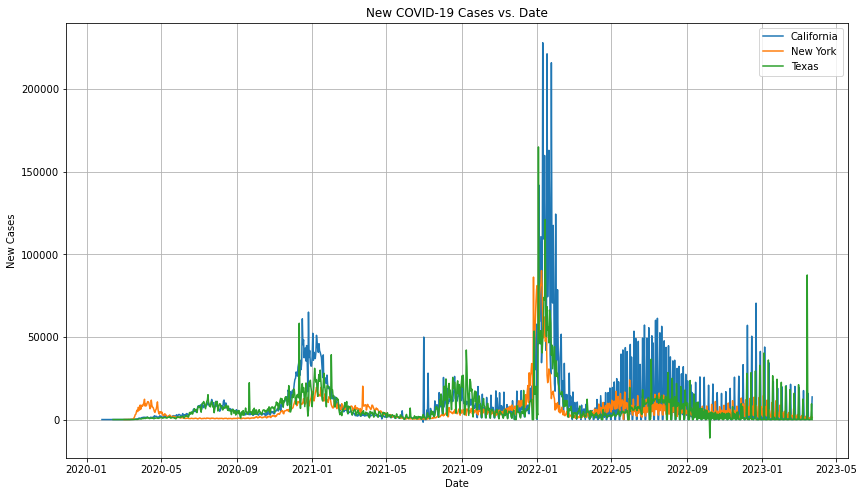

In [28]:
# Testing the function
plot_new_cases(['California', 'New York', 'Texas'])

## Date of its highest number of new cases
To achieve this, first need to process the data to compute the new cases for each state, and then identify the date with the highest number of new cases for the specified state

In [29]:
def date_of_highest_new_cases(state_name):
    # Load the data
    url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
    df = pd.read_csv(url)

    # Filter data for the specified state
    state_data = df[df['state'] == state_name]
    
    # Calculate the new cases
    state_data['new_cases'] = state_data['cases'].diff()
    
    # Get the date of the highest number of new cases
    highest_date = state_data[state_data['new_cases'] == state_data['new_cases'].max()]['date'].iloc[0]
    
    return highest_date

In [33]:
# Testing the function
state_to_test = "New York"
print(f"The date of the highest number of new cases for {state_to_test} is: {date_of_highest_new_cases(state_to_test)}")

The date of the highest number of new cases for New York is: 2022-01-08


<ipython-input-29-975214736e1a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['new_cases'] = state_data['cases'].diff()


**Note**: This function assumes that there's only one date with the highest number of new cases. If there are multiple dates with the same highest number, it'll return the first occurrence.

## Comparing Peaks of Daily New COVID-19 Cases Between Two States

We aim to compare two states to determine which one reached its peak in daily new COVID-19 cases first, and by how many days one's peak is separated from the other's.

### Function Design

We'll create a function `peak_comparison` which takes the names of two states. This function will report:

1. Which state had its highest number of daily new cases first.
2. The number of days that separate one state's peak from the other's.

In [34]:
import pandas as pd

def peak_comparison(state1, state2):
    # Load the data
    url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
    df = pd.read_csv(url)

    # Function to get the date of highest new cases for a state
    def get_peak_date(state):
        state_data = df[df['state'] == state]
        state_data['new_cases'] = state_data['cases'].diff()
        return state_data[state_data['new_cases'] == state_data['new_cases'].max()]['date'].iloc[0]

    peak_date1 = pd.to_datetime(get_peak_date(state1))
    peak_date2 = pd.to_datetime(get_peak_date(state2))

    if peak_date1 < peak_date2:
        earlier_state = state1
        later_state = state2
        difference = (peak_date2 - peak_date1).days
    else:
        earlier_state = state2
        later_state = state1
        difference = (peak_date1 - peak_date2).days

    return f"{earlier_state} reached its peak number of new cases first. There are {difference} days between the peaks of {earlier_state} and {later_state}."

In [35]:
# Testing the function
states_to_compare = ("California", "New York")
print(peak_comparison(*states_to_compare))

New York reached its peak number of new cases first. There are 2 days between the peaks of New York and California.


<ipython-input-34-5893a7b67187>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['new_cases'] = state_data['cases'].diff()
<ipython-input-34-5893a7b67187>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['new_cases'] = state_data['cases'].diff()


This will output the state that had its peak first and the number of days separating the two peaks.

**Note**: This function assumes a unique date of the highest number of new cases for each state. If multiple dates have the same highest number for a state, the function considers the first occurrence.